# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json, pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API for getting City Lat and Long
url_geocoding = "http://api.openweathermap.org/geo/1.0/direct?"

#Create empty dict
city_dict = {}



for city in cities[:5]:
    #print(city)
    #city_dict [city] = [[1,2]]

    param = {
        "q": city,
        "limit": 1,
        "appid": weather_api_key
    }
    #print(city)
    response = requests.get(url_geocoding, params=param).json()
    city_dict[city] = [response[0]["lat"],response[0]["lon"]]
    #print(json.dumps(response, indent=4, sort_keys= True))

pprint.pprint(city_dict)


{'albany': [42.6511674, -73.754968],
 'busselton': [-33.644499, 115.3488754],
 'kawalu': [-1.9593, 123.8495],
 'mataura': [-46.192734, 168.8642685],
 'vrangel': [71.224739, -178.71703505]}


In [48]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#create blank dict
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities
for i, city in enumerate(city_dict):

    if i == 10:
        break
    
    # Group cities in sets of 50 for logging purposes
    if (i % 5 == 0 and i >= 5):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city
    param ={
        "lat": city_dict[city][0],
        "lon": city_dict[city][1],
        "appid": weather_api_key
    }

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params=param).json()
    
        #city_name = list(city_dict.keys())[i]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date})
    except:
        print("City not found. Skippting...")
        pass

#pprint.pprint(city_data)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#print(json.dumps(response, indent = 4, sort_keys=True))
#print(city_data)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kawalu
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | vrangel
City not found. Skippting...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------


In [49]:
pprint.pprint(city_data)

[{'City': 'kawalu',
  'Cloudiness': 84,
  'Country': 'ID',
  'Date': 1674950498,
  'Humidity': 72,
  'Lat': -1.9593,
  'Lng': 123.8495,
  'Max Temp': 300.96,
  'Wind Speed': 0.99},
 {'City': 'busselton',
  'Cloudiness': 38,
  'Country': 'AU',
  'Date': 1674950499,
  'Humidity': 56,
  'Lat': -33.6445,
  'Lng': 115.3489,
  'Max Temp': 291.38,
  'Wind Speed': 5.48},
 {'City': 'mataura',
  'Cloudiness': 8,
  'Country': 'NZ',
  'Date': 1674950500,
  'Humidity': 34,
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 298.6,
  'Wind Speed': 0.77},
 {'City': 'albany',
  'Cloudiness': 82,
  'Country': 'US',
  'Date': 1674950439,
  'Humidity': 75,
  'Lat': 42.6512,
  'Lng': -73.755,
  'Max Temp': 275.79,
  'Wind Speed': 0.45}]


In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          4
Lat           4
Lng           4
Max Temp      4
Humidity      4
Cloudiness    4
Wind Speed    4
Country       4
Date          4
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kawalu,-1.9593,123.8495,300.96,72,84,0.99,ID,1674950498
1,busselton,-33.6445,115.3489,291.38,56,38,5.48,AU,1674950499
2,mataura,-46.1927,168.8643,298.60,34,8,0.77,NZ,1674950500
3,albany,42.6512,-73.7550,275.79,75,82,0.45,US,1674950439


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_beta.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_beta.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kawalu,-1.9593,123.8495,300.96,72,84,0.99,ID,1674950498
1,busselton,-33.6445,115.3489,291.38,56,38,5.48,AU,1674950499
2,mataura,-46.1927,168.8643,298.60,34,8,0.77,NZ,1674950500
3,albany,42.6512,-73.7550,275.79,75,82,0.45,US,1674950439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

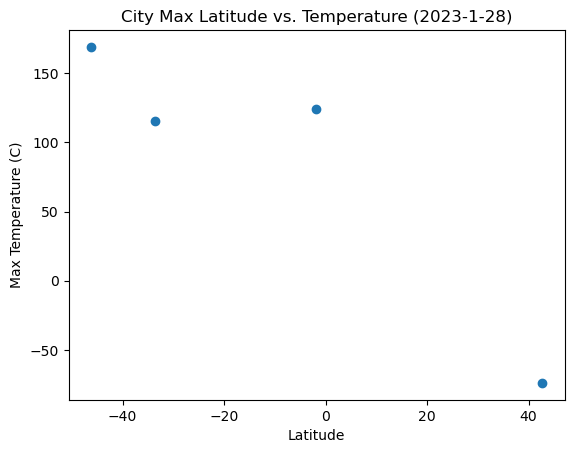

In [64]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Lng"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1_beta.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

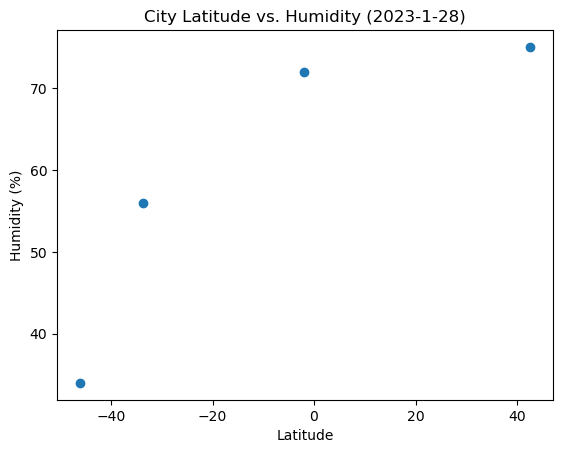

In [66]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2_beta.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

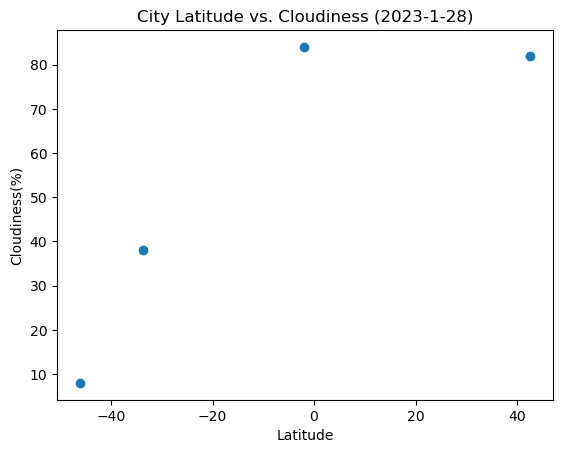

In [67]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("../output_data/Fig3_beta.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

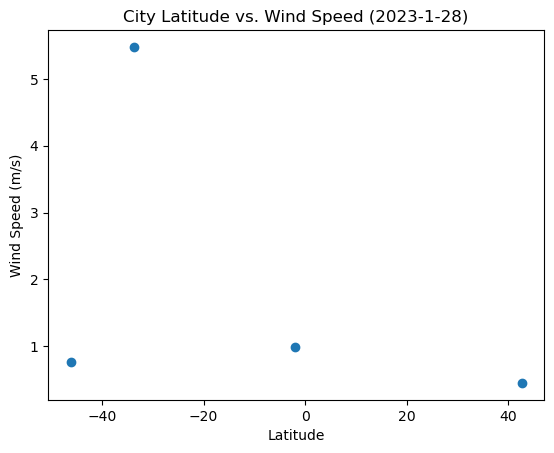

In [68]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4_beta.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def lin_regress(l_x_values,l_y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(l_x_values,l_y_values)

    #Get regression values
    regress_values = l_x_values * slope + intercept

    print(regress_values)
    line_eq = prt_lin_regress(slope,intercept)
    return(regress_values, rvalue, line_eq)

def prt_lin_regress(slope, intercept):

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    return(line_eq)
regress_values, rvalue, line_eq = lin_regress(city_data_df["Lat"],city_data_df["Max Temp"])
print(regress_values)
print(rvalue)
print(line_eq)

City_ID
0    290.010219
1    296.779912
2    299.460894
3    280.478975
Name: Lat, dtype: float64
y = -0.21x +289.59
City_ID
0    290.010219
1    296.779912
2    299.460894
3    280.478975
Name: Lat, dtype: float64
-0.7454115437431001
y = -0.21x +289.59


In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6512,-73.755,275.79,75,82,0.45,US,1674950439


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kawalu,-1.9593,123.8495,300.96,72,84,0.99,ID,1674950498
1,busselton,-33.6445,115.3489,291.38,56,38,5.48,AU,1674950499
2,mataura,-46.1927,168.8643,298.60,34,8,0.77,NZ,1674950500


###  Temperature vs. Latitude Linear Regression Plot

City_ID
3   NaN
Name: Lat, dtype: float64
y = nanx +nan
The r-value is: 0.0


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


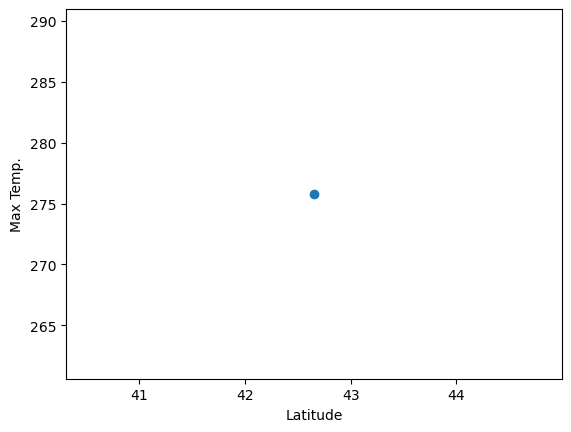

In [95]:
# Linear regression on Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0    299.555557
1    296.330773
2    295.053670
Name: Lat, dtype: float64
y = 0.1x +299.75
The r-value is: 0.21607184918935754


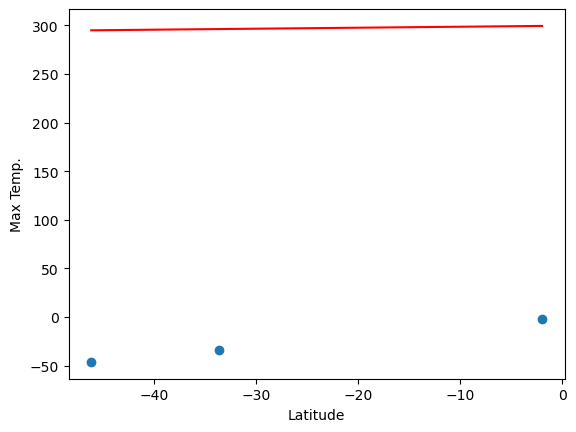

In [94]:
# Linear regression on Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(southern_hemi_df["Lat"],l_x_values)
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


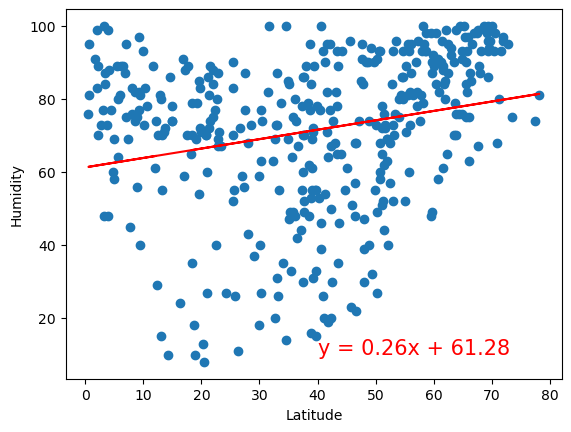

In [ ]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Humidity"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0002808747046324607


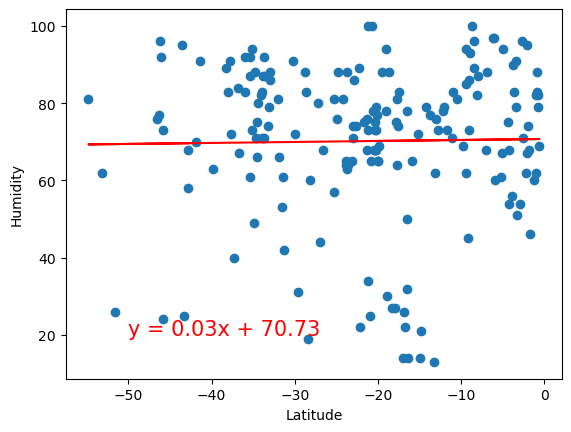

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


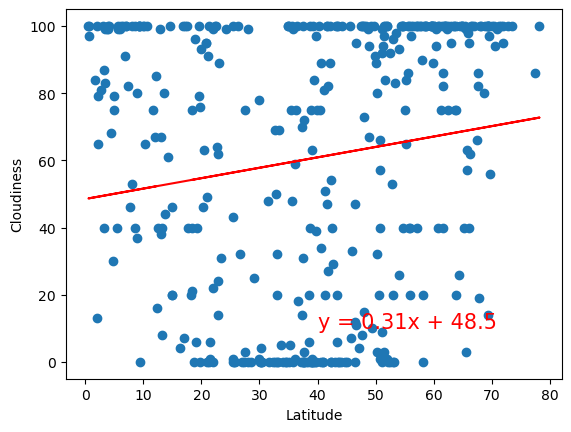

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


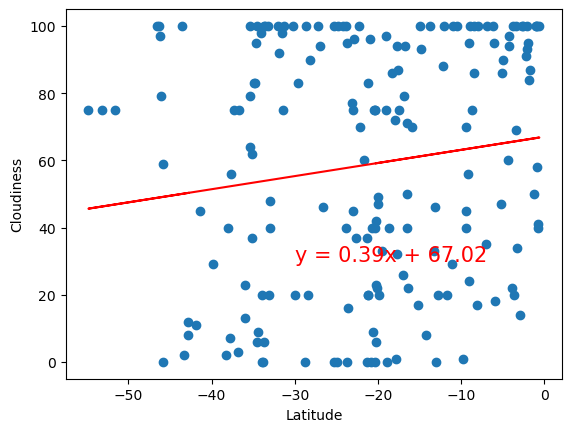

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


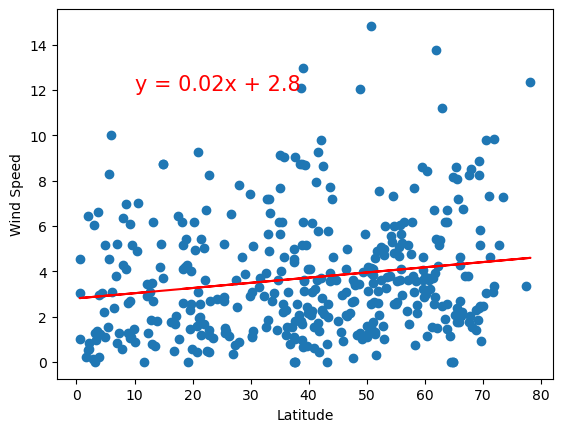

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


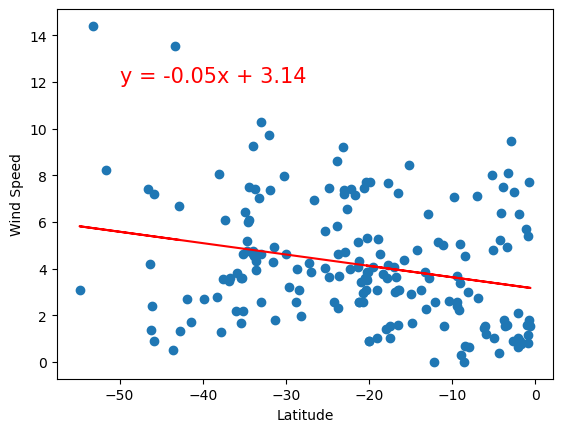

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE